# Week-19 In-class Assignment


#### 1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. Reference:
https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, plot_confusion_matrix

In [3]:
diabetes_df = pd.read_csv("A:\launch_code_STL\Final_Homework\week-13\diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [8]:

#logistic regression
clr = LogisticRegression(random_state=42).fit(X_train_sc,y_train)

#predict
y_predicted = clr.predict(X_test_sc)
# print(y_predicted)

print(clr.score(X_test_sc,y_test))

0.7359307359307359


In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

clr = LogisticRegression(random_state=42).fit(X_train_svd, y_train)

clr.score(X_test_svd, y_test)

0.70995670995671

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


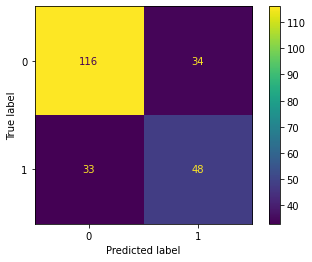

In [10]:
plot_confusion_matrix(clr,X_test_svd,y_test)

# PCA

In [6]:
from sklearn.decomposition import PCA
pca= PCA(n_components=6, random_state=42)

X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

clr = LogisticRegression(random_state=42).fit(X_train_pca, y_train)

clr.score(X_test_pca, y_test)


# principalComponents_diabetes = diabetes_df.fit_transform(X)

0.7489177489177489

# Linear Discriminant Analysis

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(X_train_sc, y_train)
lda.fit(X_train_sc, y_train)


clr = LogisticRegression(random_state=42).fit(X_train_sc, y_train)

clr.score(X_test_sc, y_test)

0.7359307359307359

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.fit_transform(X_test, y_test)

logreg = LogisticRegression(random_state=42).fit(X_train_lda, y_train)

logreg.score(X_test_lda, y_test)


0.7489177489177489

#### 2. Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods. 

#### Input 1:  2.33.245.5
#### Output 1:  True

#### Input 2:  12.345.67.89
#### Output 2:  False

In [73]:
def IP_address(s):
    a = s.split('.')
    if len(a) != 4:
        return False
    for X in a:
        if not X.isdigit():
            return False
        i = int(X)
        if i<0 or i>255:
            return False
        else:
            return True
    
IP_address('2.33.245.5')

True

In [77]:
IP_address('12.345.67.89')

True

In [85]:
def IPv4_address(address):
    import numbers
    if address.count(".") !=3:
        return False
    elif address == "":
        return False
    else:
        lst_split_address = address.split(".")
        for k in lst_split_address:
            if k.isnumeric() == False:
                return False
                break
        slice_split_address = [int(num) for num in lst_split_address[0:]]
        m=0
        for u in slice_split_address:
            if u > 255:
                return False
            else:
                m = m + 1
        if m == 4:
            return True
        else:
            return False
print(IPv4_address('2.33.245.5'))
print(IPv4_address('12.345.67.89'))

True
False
